Gender Classification (https://www.kaggle.com/elakiricoder/gender-classification-dataset)

In [96]:
import pandas as pd
dataset = pd.read_csv('./gender_classification_v7.csv')
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [97]:
#Arrumando os valores
X , y = dataset.values[:, :7], dataset.values[:, 7] #O item na posição 7 é o sexo, no caso, a resposta final
#Fazendo com que os daodos de sexo virem numeros 0=Homem 1=Mulher
import numpy as np
y = np.where(y=='Male', 0, y)
y = np.where(y=='Female', 1, y)
y = y.astype('int')

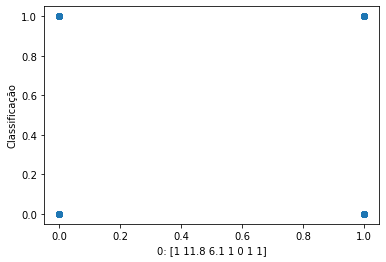

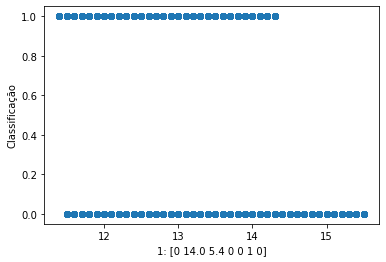

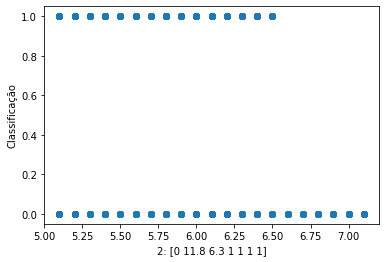

In [98]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.xlabel(f'{i}: {X[i]}')
    plt.ylabel('Classificação')
    plt.scatter(X[:, i], y)
    plt.show()

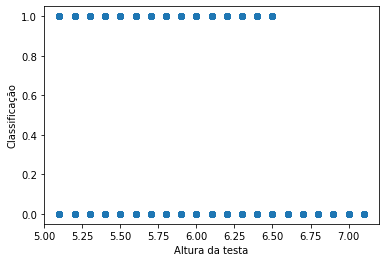

In [99]:
XalturaTesta = X[:, 2].reshape(-1, 1)  #receber apenas a altura da testa
plt.xlabel('Altura da testa')
plt.ylabel('Classificação')
plt.scatter(XalturaTesta, y)

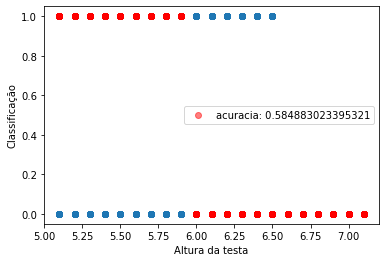

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

#Usando a classe LogisticRegression do skleann
modelo = LogisticRegression()
modelo.fit(XalturaTesta, y)
ypred = modelo.predict(XalturaTesta)
acuracia = accuracy_score(y, ypred) #Calcula a acuracia do modelo
plt.xlabel('Altura da testa')
plt.ylabel('Classificação')
plt.scatter(XalturaTesta, y)
plt.plot(XalturaTesta, ypred, 'ro', label=f'acuracia: {acuracia}', alpha=0.5)
plt.legend()
plt.show()

In [101]:
print(modelo.intercept_, modelo.coef_)

[6.43118849] [[-1.08210096]]


In [108]:
np.mean(np.diff(X[:, i]))

-0.00013999999999999985

[-1 0 0 ... 0 0 0]


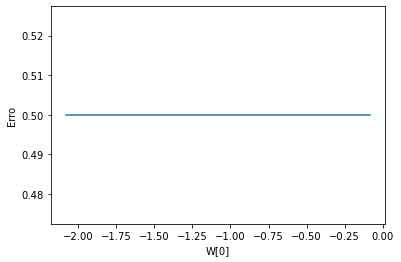

[2.1999999999999993 -2.1999999999999993 2.5999999999999996 ... 1.0
 0.29999999999999893 2.200000000000001]


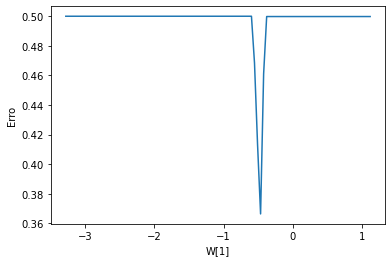

[-0.6999999999999993 0.8999999999999995 -0.20000000000000018 ...
 0.2999999999999998 0.5 -0.7999999999999998]


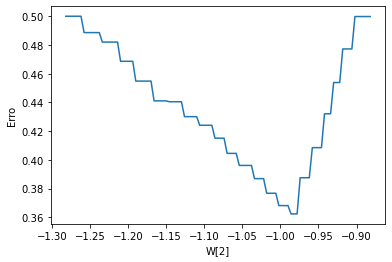

[-1 1 -1 ... 0 0 1]


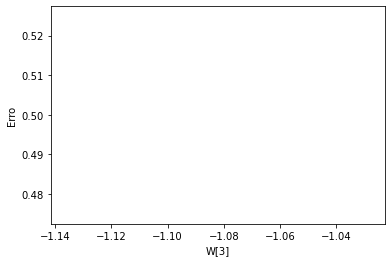

[0 1 0 ... 0 0 1]


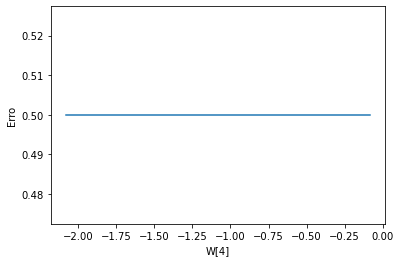

[0 0 0 ... 0 0 1]


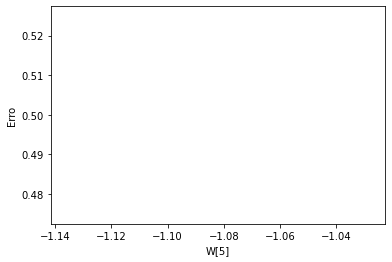

In [111]:
def plot(i):
    #Funcao para plotar o grafico de cada classe 
    delta = np.diff(X[:, i]) #Recebe a variação entre os resultados
    print(delta)
    erros = []
    coef = modelo.coef_
    ws = np.linspace(coef-delta[i], coef+delta[i], 101)
    for w in ws:
        modelo.coef_ = w
        ypred = modelo.predict(X[:, i].reshape(-1, 1))
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.coef_ = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws.reshape(-1, 1), erros)
    plt.show()

for i in range(6):
    plot(i)


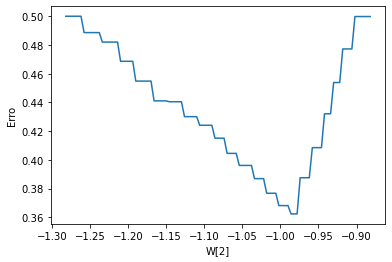

In [106]:
#Printar os erros
i=2
erros = []
delta = np.diff(X[:, i])
coef = modelo.coef_
ws = np.linspace(coef-delta[i], coef+delta[i], 101)
for w in ws:
        modelo.coef_ = w
        ypred = modelo.predict(X[:, i].reshape(-1, 1))
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
modelo.coef_ = coef
plt.ylabel("Erro")
plt.xlabel(f"W[{i}]")
plt.plot(ws.reshape(-1, 1),erros)
plt.show()